In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',325)

# check data set

In [2]:
# read and reshape the data
xlsx = pd.ExcelFile('Data for technical assessment.xlsx')
df1 = pd.read_excel(xlsx, 'Dataset 1 - General',header=[0, 1],index_col=0)
df2 = pd.read_excel(xlsx, 'Dataset 2 - Underwriting',header=[0, 1],index_col=0)
df = pd. merge(df1, df2, left_index=True, right_index=True)

df_re = df.stack(1).swaplevel(1,0).sort_index()
df_re.index.set_names(['year', 'firm'], inplace=True)

# Task 1

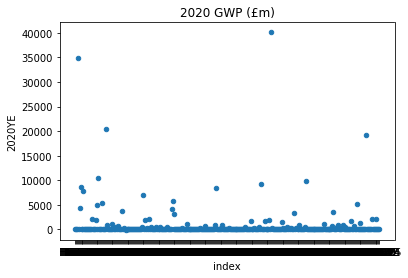

In [3]:
#firm size - by 2020 GWP 
df['GWP (£m)'].reset_index().plot.scatter(x = 'index', y = '2020YE',title='2020 GWP (£m)')

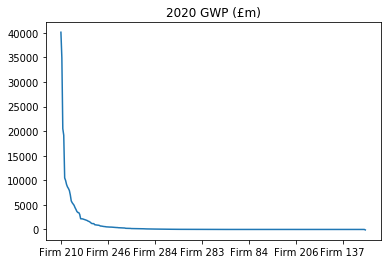

In [4]:
df['GWP (£m)']['2020YE'].sort_values(ascending=False).plot(title='2020 GWP (£m)')

In [5]:
df['GWP (£m)']['2020YE'].sort_values(ascending=False).head(15)

Firm 210    40135.692258
Firm 4      34922.702554
Firm 34     20510.750552
Firm 311    19180.016479
Firm 26     10489.248083
Firm 247     9961.520679
Firm 199     9149.583691
Firm 7       8652.947413
Firm 151     8341.643250
Firm 10      7923.371752
Firm 73      7016.188731
Firm 105     5811.661920
Firm 30      5442.876586
Firm 301     5186.507790
Firm 25      4914.195759
Name: 2020YE, dtype: float64

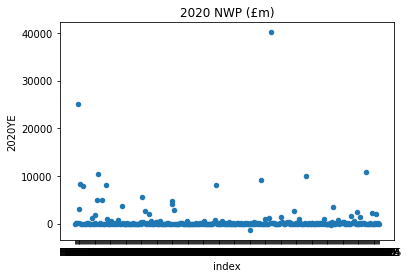

In [6]:
#firm size - by 2020 NWP 
df['NWP (£m) '].reset_index().plot.scatter(x = 'index', y = '2020YE',title='2020 NWP (£m)')

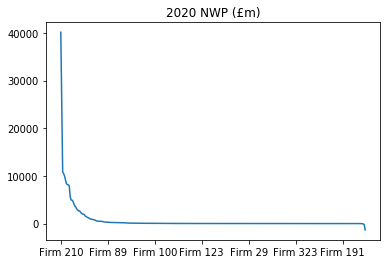

In [7]:
df['NWP (£m) ']['2020YE'].sort_values(ascending=False).plot(title='2020 NWP (£m)')

In [8]:
df['NWP (£m) ']['2020YE'].sort_values(ascending=False).head(15)

Firm 210    40135.692258
Firm 4      24996.021042
Firm 311    10830.966262
Firm 26     10489.248083
Firm 247     9961.520679
Firm 199     9134.283485
Firm 7       8359.905292
Firm 151     8180.387573
Firm 34      8145.617320
Firm 10      7893.064120
Firm 73      5655.803588
Firm 30      4944.576605
Firm 25      4914.195759
Firm 105     4641.248617
Firm 104     4082.462188
Name: 2020YE, dtype: float64

Text(0, 0.5, '2020 NWP (£m)')

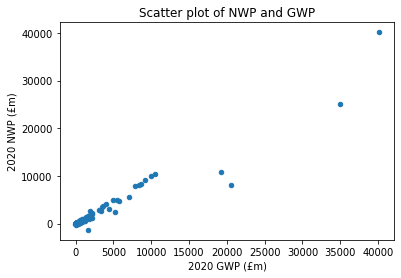

In [9]:
a=df['NWP (£m) ']['2020YE'].to_frame('NWP')
b=df['GWP (£m)']['2020YE'].to_frame('GWP')
c=df['Gross claims incurred (£m)']['2020YE'].to_frame('Gross claims incurred')
abc=a.merge(b, left_index=True, right_index=True).merge(c, left_index=True, right_index=True)
ax6=abc.plot.scatter('GWP', 'NWP')
ax6.set_title('Scatter plot of NWP and GWP')
ax6.set_xlabel('2020 GWP (£m)')
ax6.set_ylabel('2020 NWP (£m)')

D:\Software\software\anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, '2020 NWP (£m)')

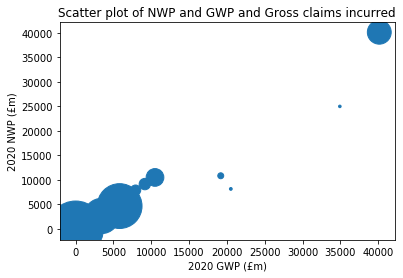

In [10]:
ax7=abc.plot.scatter('GWP', 'NWP',abc['Gross claims incurred'])
ax7.set_title('Scatter plot of NWP and GWP and Gross claims incurred')
ax7.set_xlabel('2020 GWP (£m)')
ax7.set_ylabel('2020 NWP (£m)')

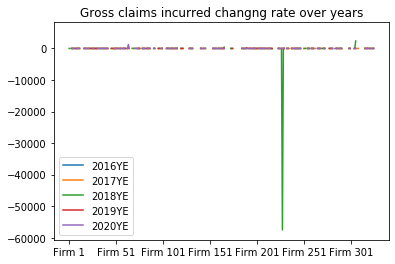

In [11]:
# Changing business profile 
df_p2=df['Gross claims incurred (£m)']
ax=df_p2.pct_change(axis=1).plot(title='Gross claims incurred changng rate over years')

(-30, 30)

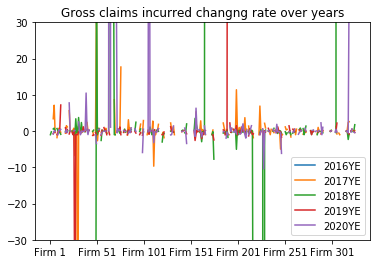

In [12]:
ax=df_p2.pct_change(axis=1).plot(title='Gross claims incurred changng rate over years')
ax.set_ylim(-30,30)

In [13]:
df_p2_pct=df_p2.pct_change(axis=1)
df_p2_pct[((df_p2_pct <8000)&(df_p2_pct > 15))|(df_p2_pct <-10)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,2017YE,2018YE,2019YE,2020YE
Firm 27,NaN,NaN,-57.550957,NaN
Firm 29,NaN,NaN,NaN,5137.297450
Firm 30,-72.553134,NaN,NaN,NaN
Firm 49,NaN,-113.461714,NaN,NaN
Firm 50,33.038396,41.701136,NaN,NaN
Firm 64,NaN,183.180000,NaN,1255.907535
Firm 68,NaN,57.122915,NaN,NaN
Firm 71,NaN,NaN,NaN,48.008715
Firm 76,17.672619,NaN,NaN,NaN
Firm 106,NaN,NaN,NaN,163.048174


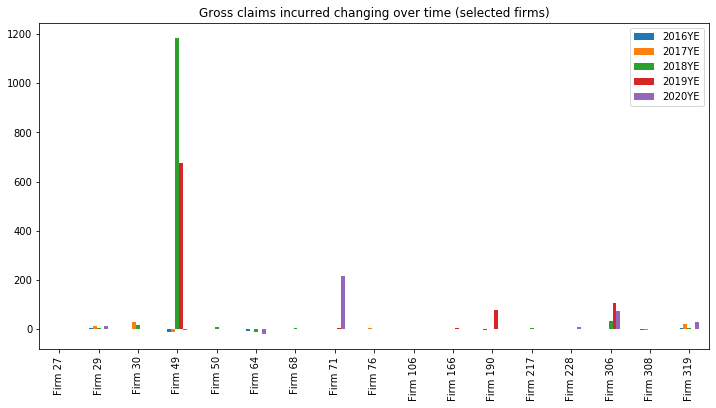

In [14]:
df_p2.filter(items = ['Firm 27','Firm 29','Firm 30','Firm 49','Firm 50','Firm 64','Firm 68','Firm 71','Firm 76','Firm 106','Firm 166','Firm 190','Firm 217','Firm 228','Firm 306','Firm 308', 'Firm 319'], axis=0).plot(kind='bar',figsize=(12,6),title='Gross claims incurred changing over time (selected firms)')

In [15]:
# outlier
df.describe()

NWP (£m)                                                           \
             2016YE        2017YE        2018YE        2019YE        2020YE   
count    325.000000    325.000000    325.000000    325.000000    325.000000   
mean     637.606837    799.610849    844.030970    782.373137    658.350221   
std     3858.919674   3287.474920   3687.130996   3453.361810   3036.308650   
min   -13779.815629  -2305.854316   -193.083319   -181.612136  -1336.553317   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.390134     10.742034     10.160408      6.581324      2.742672   
75%      104.181634    190.786032    180.646731    106.600218     64.369695   
max    45309.838702  38199.311256  48117.993733  44638.769640  40135.692258   

           SCR (£m)                                                          \
             2016YE        2017YE        2018YE        2019YE        2020YE   
count    325.000000    325.000000    325.000000    325.000000    325.000000   
mean     357.727891    354.960389    332.292727    325.169686    322.303655   
std     1386.190034   1457.041682   1336.047978   1348.448559   1457.915294   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.236345      2.504460      1.794726      0.895408      0.000000   
50%       22.307602     20.351489     15.148105     12.369675      9.233553   
75%      125.085243    108.515860    108.720854     99.264419     79.159114   
max    16573.644800  16332.748800  17103.616000  17219.246080  19600.262144   

      EoF for SCR (£m)                                            \
                2016YE        2017YE        2018YE        2019YE   
count       325.000000    325.000000    325.000000    325.000000   
mean        545.431731    549.687866    513.530438    520.072846   
std        2016.726228   2148.986294   1986.558550   2069.399298   
min         -72.664215    -55.115793    -50.790781    -59.294332   
25%          10.013649      7.857708      6.226042      4.972941   
50%          43.809827     38.546411     33.550451     30.604524   
75%         193.297327    196.877806    184.950704    187.082179   
max       23862.762984  23493.658823  25284.403791  26861.460363   

                    SCR coverage ratio                              \
             2020YE             2016YE        2017YE        2018YE   
count    325.000000       3.250000e+02  3.250000e+02  3.250000e+02   
mean     504.614369       1.286947e+04  5.930313e+06  1.246741e+04   
std     2150.153826       2.319518e+05  6.529400e+07  2.141325e+05   
min     -110.793044      -1.974450e+00 -1.973652e+00 -5.515428e-01   
25%        0.000000       1.276845e+00  1.302423e+00  1.268210e+00   
50%       23.042749       1.662747e+00  1.755881e+00  1.693416e+00   
75%      143.870391       2.780175e+00  3.203697e+00  2.795907e+00   
max    28772.492631       4.181573e+06  9.635840e+08  3.856018e+06   

                                         GWP (£m)                              \
              2019YE         2020YE        2016YE        2017YE        2018YE   
count     325.000000     325.000000    325.000000    325.000000    325.000000   
mean      533.017116     514.215109    842.126715    909.774328   1046.757353   
std      9539.236980    9229.786796   3980.798811   3545.771115   4163.304896   
min        -0.669013      -1.066521    -13.873442     -4.948002     -7.917129   
25%         1.177754       0.000000      0.000000      0.000000      0.000000   
50%         1.710544       1.565516     10.940987     19.812373     19.623853   
75%         2.691263       2.367988    200.808629    263.818789    264.539561   
max    171974.690816  166394.575872  45309.819760  38199.311256  48117.993733   

                                  Total assets (£m)                 \
             2019YE        2020YE            2016YE         2017YE   
count    325.000000    325.000000        325.000000     325.000000   
mean     972.489525    83

Text(0.5, 1.0, 'Boxplot of SCR coverage ratio ')

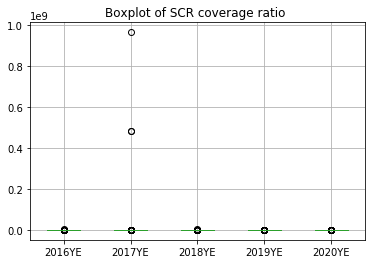

In [16]:
ax2=df['SCR coverage ratio'].boxplot()
ax2.set_title('Boxplot of SCR coverage ratio ')

(-100, 500)

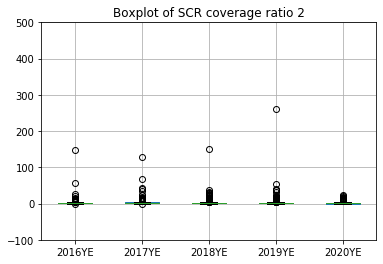

In [17]:
ax4=df['SCR coverage ratio'].boxplot()
ax4.set_title('Boxplot of SCR coverage ratio 2')
ax4.set_ylim(-100,500)

In [18]:
df_p3=df['SCR coverage ratio']
df_p3[((df_p3 >500))].dropna(axis=0, how='all')

,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 1,NaN,4.817920e+08,NaN,NaN,NaN
Firm 66,NaN,NaN,3.856018e+06,NaN,NaN
Firm 127,NaN,1.824122e+05,1.947538e+05,171974.690816,166394.575872
Firm 131,NaN,4.817920e+08,NaN,NaN,NaN
Firm 216,NaN,9.635840e+08,NaN,NaN,NaN
Firm 320,4.181573e+06,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Boxplot of Net combined ratio')

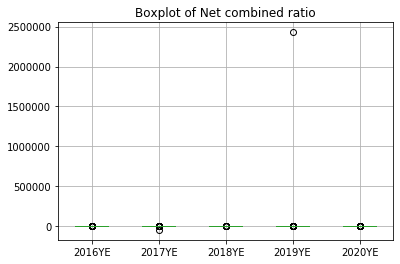

In [19]:
ax3=df['Net combined ratio'].boxplot()
ax3.set_title('Boxplot of Net combined ratio')

In [20]:
df_p4=df['Net combined ratio']
df_p4[((df_p4 >100)|(df_p4 <0))].dropna(axis=0, how='all')

,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 4,NaN,NaN,NaN,NaN,-3.408470
Firm 8,NaN,NaN,-1.113032,NaN,NaN
Firm 28,-124.288370,821.470228,1578.853894,NaN,NaN
Firm 47,NaN,-0.038251,NaN,NaN,NaN
Firm 49,NaN,-7.049593,NaN,NaN,NaN
Firm 50,-42.856962,-0.790914,-0.214253,NaN,NaN
Firm 51,NaN,-5.404425,NaN,NaN,NaN
Firm 55,NaN,NaN,NaN,-2.516977e+02,NaN
Firm 69,NaN,-0.529174,NaN,NaN,NaN
Firm 70,NaN,1738.295847,NaN,NaN,NaN


(-100, 200)

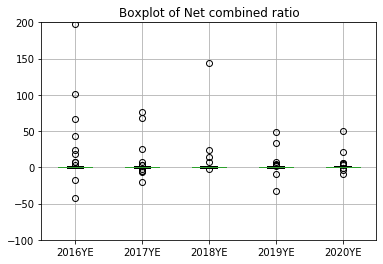

In [21]:
ax5=df['Net combined ratio'].boxplot()
ax5.set_title('Boxplot of Net combined ratio')
ax5.set_ylim(-100,200)

# task 2

In [22]:
#kmeans
d=df['SCR coverage ratio']['2020YE'].to_frame('SCR coverage ratio')
e=df['Net combined ratio']['2020YE'].to_frame('Net combined ratio')
metric=abc.merge(d, left_index=True, right_index=True).merge(e, left_index=True, right_index=True)

In [23]:
scaler = MinMaxScaler() #0,1
metric_= scaler.fit_transform(metric)

for K in range(3,14,2):
    km = KMeans(n_clusters=K, random_state=0).fit(metric_)
    WC = km.inertia_
    #BC
    between = np.zeros((K))
    for i in range(K): 
        between[i] = 0.0
        for l in range(i+1, K): 
            # tally the distance from this cluster centre to the centres of the remaining five clusters
            between[i] += (np.square(km.cluster_centers_[i][0]-km.cluster_centers_[l][0]) 
                           + np.square(km.cluster_centers_[i][1]-km.cluster_centers_[l][1])
                           + np.square(km.cluster_centers_[i][2]-km.cluster_centers_[l][2])
                           + np.square(km.cluster_centers_[i][3]-km.cluster_centers_[l][3])
                           + np.square(km.cluster_centers_[i][4]-km.cluster_centers_[l][4])
                           )
                           
    BC = np.sum(between)
    score = BC/WC
    #silhouette = silhouette_score(X, km.labels_, metric='euclidean')
    print('K={}\n  BC={}\n  WC={}\n  score={}\n\n'.format( K, BC, WC, score))

K=3
  BC=1.8886861031299738
  WC=5.896362818783526
  score=0.3203137529314431


K=5
  BC=9.685430343287882
  WC=2.4471047232869094
  score=3.9579141223995418


K=7
  BC=22.738514847390622
  WC=1.0269639430467121
  score=22.1414928940269


K=9
  BC=31.61847582904872
  WC=0.5815855961822914
  score=54.36598849180967


K=11
  BC=46.229158541002704
  WC=0.39592227646329237
  score=116.76321664433753


K=13
  BC=69.79688904753314
  WC=0.21473526493157166
  score=325.0369196218184




In [24]:
metric_=pd.DataFrame(metric_)
metric_.head(2)

,0,1,2,3,4
0,0.032228,0.002372,0.0067,0.000006,0.008742
1,0.032751,0.002912,0.0067,0.000030,0.008742


In [25]:
#n=7
kmeans = KMeans(n_clusters=7, random_state=1)
y = kmeans.fit_predict(metric_)
dist=kmeans.transform(metric_)
metric_['Cluster'] = y
metric_

,0,1,2,3,4,Cluster
0,0.032228,0.002372,0.006700,0.000006,0.008742,0
1,0.032751,0.002912,0.006700,0.000030,0.008742,0
2,0.034295,0.004768,0.006700,0.000014,0.008742,0
3,0.634945,0.870424,0.008811,0.000015,0.005603,1
4,0.034187,0.004452,0.126877,0.000018,0.009720,0
5,0.105575,0.113045,0.064033,0.000015,0.009512,0
6,0.233806,0.217453,0.006700,0.000015,0.008742,5
7,0.032228,0.002372,0.006700,0.000006,0.008742,0
8,0.032457,0.002616,0.006700,0.000021,0.008742,0
9,0.222549,0.199318,0.040900,0.000015,0.009613,5


In [26]:
df_dis=pd.DataFrame(dist.sum(axis=1).round(2), columns=['distance'])
re=metric_.merge(df_dis,left_index=True, right_index=True)
re

,0,1,2,3,4,Cluster,distance
0,0.032228,0.002372,0.006700,0.000006,0.008742,0,4.55
1,0.032751,0.002912,0.006700,0.000030,0.008742,0,4.55
2,0.034295,0.004768,0.006700,0.000014,0.008742,0,4.54
3,0.634945,0.870424,0.008811,0.000015,0.005603,1,7.21
4,0.034187,0.004452,0.126877,0.000018,0.009720,0,4.41
5,0.105575,0.113045,0.064033,0.000015,0.009512,0,4.33
6,0.233806,0.217453,0.006700,0.000015,0.008742,5,4.48
7,0.032228,0.002372,0.006700,0.000006,0.008742,0,4.55
8,0.032457,0.002616,0.006700,0.000021,0.008742,0,4.55
9,0.222549,0.199318,0.040900,0.000015,0.009613,5,4.40


In [27]:
re.groupby('Cluster')['distance'].mean()

Cluster
0    4.511979
1    8.070000
2    4.523750
3    6.960000
4    5.885000
5    4.596364
6    7.240000
Name: distance, dtype: float64

In [28]:
re['avg_dis']=re.groupby('Cluster')['distance'].transform('mean')
re

,0,1,2,3,4,Cluster,distance,avg_dis
0,0.032228,0.002372,0.006700,0.000006,0.008742,0,4.55,4.511979
1,0.032751,0.002912,0.006700,0.000030,0.008742,0,4.55,4.511979
2,0.034295,0.004768,0.006700,0.000014,0.008742,0,4.54,4.511979
3,0.634945,0.870424,0.008811,0.000015,0.005603,1,7.21,8.070000
4,0.034187,0.004452,0.126877,0.000018,0.009720,0,4.41,4.511979
5,0.105575,0.113045,0.064033,0.000015,0.009512,0,4.33,4.511979
6,0.233806,0.217453,0.006700,0.000015,0.008742,5,4.48,4.596364
7,0.032228,0.002372,0.006700,0.000006,0.008742,0,4.55,4.511979
8,0.032457,0.002616,0.006700,0.000021,0.008742,0,4.55,4.511979
9,0.222549,0.199318,0.040900,0.000015,0.009613,5,4.40,4.596364


In [29]:
re['index'] = df.index
re.set_index('index',inplace=True)
re['diff']=re['avg_dis']-re['distance']
re.sort_values(by=['diff'])

,0,1,2,3,4,Cluster,distance,avg_dis,diff
index,,,,,,,,,
Firm 112,0.032228,0.002372,1.000000,0.000006,0.009605,4,7.16,5.885000,-1.275000
Firm 210,1.000000,1.000000,0.189586,0.000019,0.009702,1,8.93,8.070000,-0.860000
Firm 34,0.228639,0.512195,0.009173,0.000015,0.010267,5,5.26,4.596364,-0.663636
Firm 311,0.293389,0.479118,0.018085,0.000014,0.009651,5,5.18,4.596364,-0.583636
Firm 228,0.032493,0.002645,0.009992,0.000015,1.000000,3,7.38,6.960000,-0.420000
Firm 283,0.032526,0.002679,0.488792,0.000027,0.009557,2,4.86,4.523750,-0.336250
Firm 74,0.037587,0.010941,0.478972,0.000018,0.009703,2,4.81,4.523750,-0.286250
Firm 22,0.032847,0.003412,0.445438,0.000014,0.009628,2,4.73,4.523750,-0.206250
Firm 304,0.032652,0.002809,0.425043,0.000016,0.009714,2,4.67,4.523750,-0.146250


In [32]:
#n=9
metric_=pd.DataFrame(metric_)
kmeans = KMeans(n_clusters=9, random_state=1)
y = kmeans.fit_predict(metric_)
metric_['Cluster'] = y

dist=kmeans.transform(metric_)
df_dis=pd.DataFrame(dist.sum(axis=1).round(2), columns=['distance'])
re=metric_.merge(df_dis,left_index=True, right_index=True)
re['avg_dis']=re.groupby('Cluster')['distance'].transform('mean')
re['index'] = df.index
re.set_index('index',inplace=True)
re['diff']=re['avg_dis']-re['distance']
re.sort_values(by=['diff'])

,0,1,2,3,4,Cluster,distance,avg_dis,diff
index,,,,,,,,,
Firm 34,0.228639,0.512195,0.009173,0.000015,0.010267,1,14.50,13.821818,-6.781818e-01
Firm 311,0.293389,0.479118,0.018085,0.000014,0.009651,1,14.47,13.821818,-6.481818e-01
Firm 210,1.000000,1.000000,0.189586,0.000019,0.009702,5,29.03,28.520000,-5.100000e-01
Firm 112,0.032228,0.002372,1.000000,0.000006,0.009605,7,45.13,44.815000,-3.150000e-01
Firm 228,0.032493,0.002645,0.009992,0.000015,1.000000,4,20.70,20.416667,-2.833333e-01
Firm 283,0.032526,0.002679,0.488792,0.000027,0.009557,3,13.69,13.552222,-1.377778e-01
Firm 74,0.037587,0.010941,0.478972,0.000018,0.009703,3,13.66,13.552222,-1.077778e-01
Firm 301,0.090253,0.131290,0.006700,0.000018,0.008742,0,19.86,19.758034,-1.019658e-01
Firm 104,0.130666,0.103847,0.006700,0.000055,0.008742,0,19.85,19.758034,-9.196581e-02


In [33]:
#n=5
metric_=pd.DataFrame(metric_)
kmeans = KMeans(n_clusters=5, random_state=1)
y = kmeans.fit_predict(metric_)
metric_['Cluster'] = y

dist=kmeans.transform(metric_)
df_dis=pd.DataFrame(dist.sum(axis=1).round(2), columns=['distance'])
re=metric_.merge(df_dis,left_index=True, right_index=True)
re['avg_dis']=re.groupby('Cluster')['distance'].transform('mean')
re['index'] = df.index
re.set_index('index',inplace=True)
re['diff']=re['avg_dis']-re['distance']
re.sort_values(by=['diff'])

,0,1,2,3,4,Cluster,distance,avg_dis,diff
index,,,,,,,,,
Firm 112,0.032228,0.002372,1.000000,0.000006,0.009605,1,14.87,13.496111,-1.373889
Firm 17,0.032228,0.002372,0.742843,0.000006,0.009601,1,14.28,13.496111,-0.783889
Firm 210,1.000000,1.000000,0.189586,0.000019,0.009702,2,14.34,13.608333,-0.731667
Firm 52,0.032460,0.002775,0.634450,0.000017,0.009908,1,14.07,13.496111,-0.573889
Firm 105,0.144140,0.146829,0.653060,0.000014,0.009663,1,14.05,13.496111,-0.553889
Firm 34,0.228639,0.512195,0.009173,0.000015,0.010267,4,13.53,13.406364,-0.123636
Firm 283,0.032526,0.002679,0.488792,0.000027,0.009557,3,12.47,12.354000,-0.116000
Firm 74,0.037587,0.010941,0.478972,0.000018,0.009703,3,12.46,12.354000,-0.106000
Firm 311,0.293389,0.479118,0.018085,0.000014,0.009651,4,13.51,13.406364,-0.103636
